<a href="https://colab.research.google.com/github/ritikraushan57/Task-7/blob/main/Task_7_(EL).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import sqlite3

# 1️⃣ Create a database file (or connect if it exists)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# 2️⃣ Create a table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# 3️⃣ Insert some sample rows
sample_data = [
    (1, "Apples", 10, 2.5),
    (2, "Bananas", 15, 1.2),
    (3, "Oranges", 8, 3.0)
]
cursor.executemany("INSERT INTO sales VALUES (?, ?, ?, ?)", sample_data)

# 4️⃣ Save & close
conn.commit()
conn.close()

print("✅ SQLite database created: sales_data.db")


✅ SQLite database created: sales_data.db


Saving sales_data.csv to sales_data (1).csv

📊 Basic Sales Summary:
   product  total_qty  revenue
0   Apples         15     37.5
1  Bananas         22     26.4
2   Grapes         35    140.0
3  Mangoes         16     88.0
4  Oranges         20     60.0


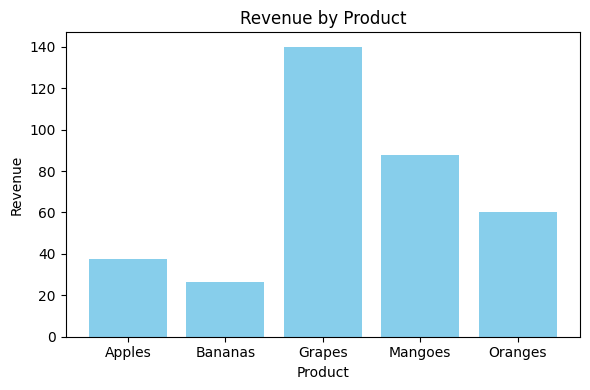

In [3]:
# Install dependencies (only needed in Colab)
!pip install pandas matplotlib

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# 1️⃣ Upload CSV file from your computer
from google.colab import files
uploaded = files.upload()

# Read uploaded CSV
df_csv = pd.read_csv(next(iter(uploaded)))

# 2️⃣ Create SQLite database and table
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY,
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

# Clear table to avoid duplicate entries
cursor.execute("DELETE FROM sales")

# 3️⃣ Insert CSV data into SQLite
df_csv.to_sql("sales", conn, if_exists="append", index=False)

# 4️⃣ SQL query: Total quantity & revenue by product
query = """
SELECT
    product,
    SUM(quantity) AS total_qty,
    SUM(quantity * price) AS revenue
FROM sales
GROUP BY product
"""
df_summary = pd.read_sql_query(query, conn)

# 5️⃣ Display summary
print("\n📊 Basic Sales Summary:")
print(df_summary)

# 6️⃣ Plot revenue bar chart
plt.figure(figsize=(6,4))
plt.bar(df_summary['product'], df_summary['revenue'], color='skyblue')
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by Product')
plt.tight_layout()
plt.show()

# 7️⃣ Close connection
conn.close()
